.# Exercise 4

**Remember**
   * You are expected to use numpy and scipy libraries where appropriate.  
   * You should run each cell in order from the top of the notebook; there is no need to repeat code between cells
   * Use the "refresh kernel" button to reset everything and start again
   * Make sure your notebook runs fully & without errors, from a fresh kernel, before submitting it
   
## Overview

In this exercise, you will simulate an experiment designed to measure the lifetime of an unstable particle X.  A beam of X particles is produced with a known average velocity and injected into a vacuum chamber.  Each X particle will travel some distance into the chamber before decaying at the so-called decay vertex, $r_{vtx}$.  The charged daughter particle is then detected by several tracking stations, located at various distances ($z_{stn}$) along the beam line.  Each tracking station measures the position where the track hits the station, $r_{hit}$.  By extrapolating back from the hit positions, the position of the decay vertex can be reconstructed.  Finally, the distribution of decay points, along with the known average beam velocity, can be used to estimate the mean lifetime of the X particle.

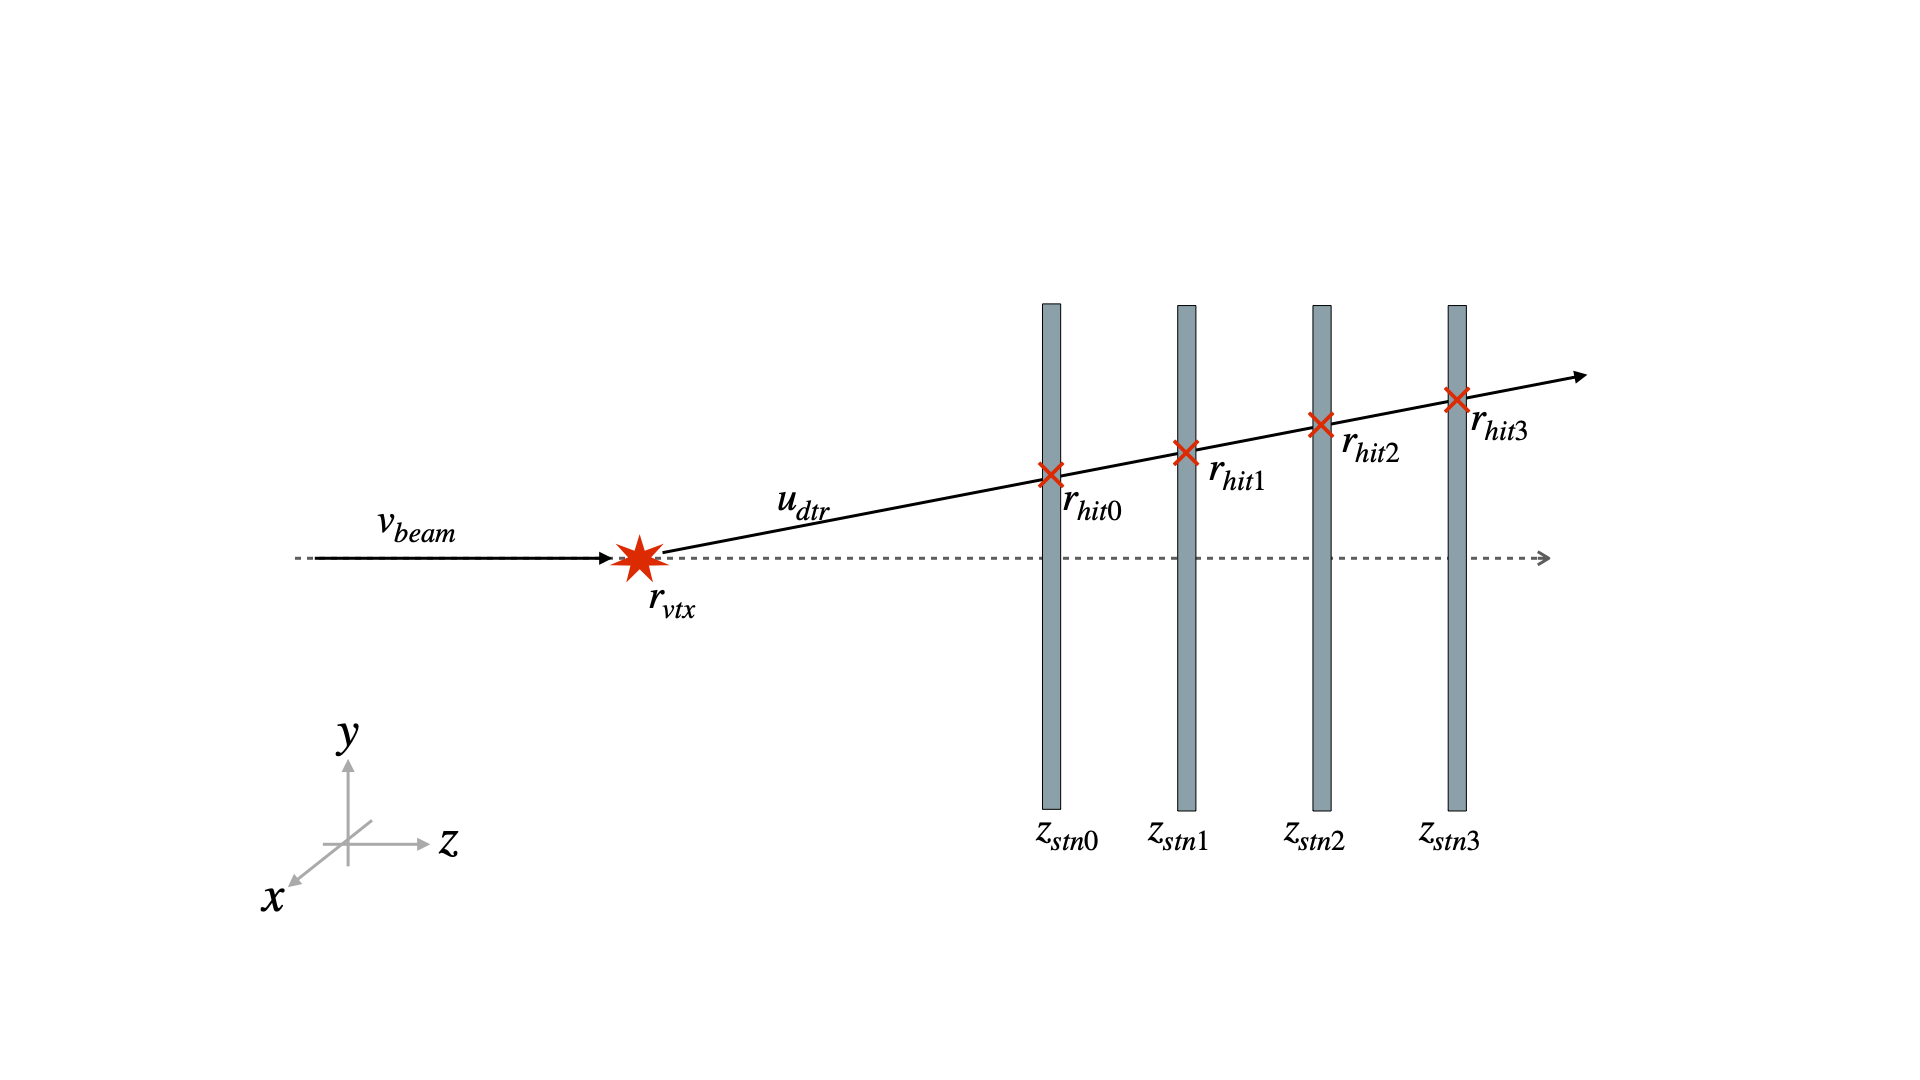

The coordinate system used below is shown in the diagram, where the beam is produced at the origin and travels in the $z$-direction.

You will use Monte Carlo methods to simulate the production, decay, and detection of particle X and it's daughter. Each part of the exercise simulates a different part of the experiment. By building up a set of functions, you will be able to simulate the full experiment.  You will then be able to simulate the experiment under different assumptions (eg. X mass, lifetime, beam parameters, tracking station positions, etc.) and make quantitative statements about how these assumptions influence the performance of the experiment.  It is strongly recommended that you use 3D vectors throughout the exercises, using numpy arrays, and numpy functions for vector algebra.

This exercise is deliberately open-ended.  A wide variety of extensions are possible, using all the topics covered in the unit.  If you are interested in exploring an extension, please discuss your plans with the unit director to ensure you efforts are well focussed.


















## Part 1 - Beam Generation

First, you should simulate the production of beam particles.  Each particle in the beam will have a velocity in the z-direction, that is drawn from a normal distribution with mean $\mu_{v}$ and standard deviation $\sigma_{v}$.  The particle should decay after a time that is drawn from an exponential distribution with mean lifetime $\tau$.  Given the velocity and the decay time, the decay position in the lab frame should then be calculated.  You can assume the beam is non-relativistic.

In the cell below, write functions to simulate the beam velocity, the decay time, and the decay vertex.

In [133]:
# beam simulation functions
import numpy as np 
import scipy.stats
import scipy.linalg as linalg 
import matplotlib.pyplot as plt
import math
import seaborn as sns

n= 1000
velocity= np.zeros([n,3]) #holds velicity of beam particles in 3d
vz = np.zeros([n]) #velosity in z direction
ver = np.zeros([n])# distance to decay 

#------------------------part 1------------------------

def beam_maker(u,s):
    ''' Function makes a beam of particle with velcities distributed normally'''
    #global vz
    z_velocity= np.random.normal(u,s,n)
    for i in range(n):
        velocity[i,2]= z_velocity[i]
        vz[i]= z_velocity[i]
    return vz 

vz = beam_maker(2000,50)

decay = np.zeros([n])
def decay_time(t):
    '''Function gives the decay time with exponential distribution'''
    for i in range(n):
        x= np.random.exponential(t,n)
        decay[i]= x[i]
    return decay

decay_time(2.5e-3)

def dist(u, s, t):
    '''function gives the distributioin of distance travelled before decay'''
    for i in range(n):
        ver[i]=decay[i]*vz[i] 
    return ver

ver= dist(2000,50,2.5e-3)



In the next cell, test your functions, and verify that they have the desired distributions.

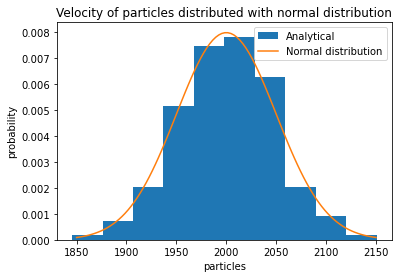

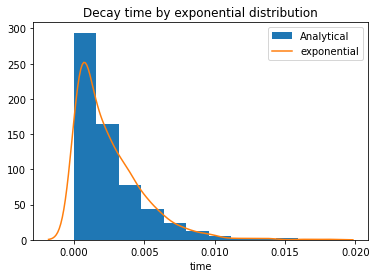

In [134]:
#testing part 1
plt.figure(1) 
plt.hist(vz, density='true', label= 'Analytical')
plt.title('Velocity of particles distributed with normal distribution')
plt.xlabel('particles')
plt.ylabel('probability')
min= 1850
max=2150
space=np.linspace(min,max,100)
y= scipy.stats.norm.pdf(space,2000,50)
plt.plot(space,y, label= 'Normal distribution')
plt.legend()
plt.show()

plt.figure(2)
plt.hist(decay,density='true', label= 'Analytical')
sns.kdeplot(np.random.exponential(2.5e-3,1000), label='exponential')
plt.title('Decay time by exponential distribution')
plt.xlabel('time')
plt.ylabel('')
plt.legend()
plt.show()


## Part 2 - Daughter Particle

Now simulate the direction of the decay product, which should be _isotropic_ in the rest frame of the beam particle. This is the same as generating points on the surface of a unit sphere, with uniform probability over the solid angle $d\Omega$. This can be achieved in spherical coordinates, by generating the two angles, $\phi$ and $\theta$.  These should not have uniform distributions, since the area element is given by :

$${\rm d}\Omega = \sin(\theta) {\rm d}\phi {\rm d}\theta$$

To obtain uniform probability over the sphere, you should generate $\phi$ with a uniform distribution between $0$ and $2\pi$, and $\theta$ with a distribution proportional to $\sin \theta$.

Note that the velocity of the daughter particle is not required in the base experiment, since we will assume the daughter follows a straight line track.  The direction vector we are producing here is equivalent to a unit vector in the direction of the daughter momentum, ie. $\frac{p_{dtr}}{|p_{dtr}|}$.

In the cell below, write functions which simulate the direction of the daughter particle in the rest frame of the beam particle, and the lab frame.

In [135]:
# decay simulation functions

def phi (n):
    '''function produces phi with random distribution between 0 and 2*pi'''
    phi= 2*np.pi*np.random.random(n)
    return phi

P=phi(n)



def theeta(n):
    """Generate a random theta between 0 and pi, with PDF sin(theta) using␣analytical method"""
    y = np.random.random(n)
    return np.arccos(1-2*y)

T=theeta(n)

x_angle = np.zeros(n)
y_angle = np.zeros (n)
z_angle = np.zeros(n)
r=1
for i in range(n): #converts angle to cartesian coordinates 
    x_angle[i]= r*np.sin(T[i])*np.cos(P[i])
    y_angle[i]= r*np.sin(T[i])*np.sin(P[i])
    z_angle[i]= r*np.cos(T[i])
    
z_lab = np.zeros(n)
def lab_frame(n):
    '''converts rest frame to lab frame'''
    for i in range(n):
        z_lab[i]= vz[i]+ z_angle[i]*10e7
    return z_lab


Z= lab_frame(n)

As for Part 1, in the next cell, test your functions and verify the desired distributions are produced.

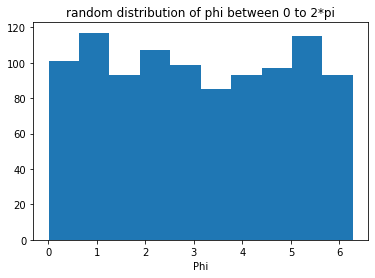

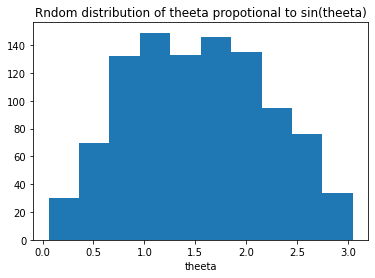

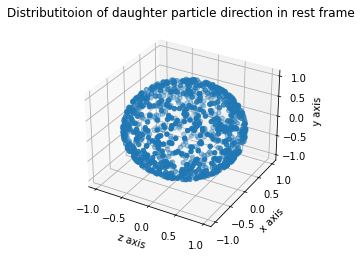

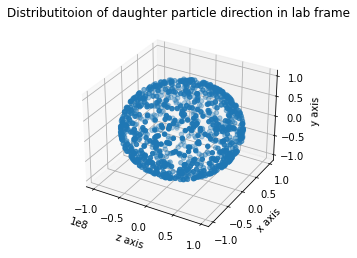

In [136]:
# test code
plt.figure(3)
plt.title('random distribution of phi between 0 to 2*pi')
plt.xlabel('Phi')
plt.hist(phi(n))
plt.show()

plt.figure(4)
plt.title('Rndom distribution of theeta propotional to sin(theeta)')
plt.xlabel('theeta')
plt.hist(theeta(n))
plt.show()
    
plt.figure(5)
ax= plt.axes(projection= '3d')
ax.set_zlabel('y axis')
plt.title('Distributitoion of daughter particle direction in rest frame')
plt.xlabel('z axis')
plt.ylabel('x axis')
ax.scatter3D(z_angle,x_angle,y_angle)
plt.show()   

plt.figure(2)
ax= plt.axes(projection= '3d')
ax.set_zlabel('y axis')
plt.title('Distributitoion of daughter particle direction in lab frame')
plt.xlabel('z axis')
plt.ylabel('x axis')
ax.scatter3D(Z, x_angle,y_angle)
plt.show()

## Part 3 - Propagation to Tracking Stations

The next step is to propagate the daughter particle to the tracking detectors. First, it is convenient to represent the track using a set of parameters. Here, the track is a straight line, which can be represented by 5 parameters :
  * $m_x = \frac{dx}{dz}$ - gradient in the $x$ direction
  * $m_y = \frac{dy}{dz}$ - gradient in the $y$ direction
  * $c_x$ - $x$-intercept at z=0
  * $c_y$ - $y$-intercept at z=0
  * $d$ - track direction (+1 for $+z$ direction, -1 for $-z$ direction)

In the cell below, write a function which calculates the track parameters from the decay vertex and daughter direction in the lab frame.

Then write another function which takes the track parameters, and computes the intercepts of the track with the tracking stations.  The function should accept a list of $z$ coordinates (one for each tracking station) and return the position $r_{hit}$ of the hit at each station.

Note that random numbers are not required for these functions.

In [137]:
# tracking functions

m_x= np.zeros(n)
m_y= np.zeros(n)
c_x= np.zeros(n)
c_y= np.zeros(n)
D= np.zeros(n)
def parameter():
    '''function finds the parameter values as for each particle'''
    global m_x, c_x, m_y,c_y, D
    for i in range(n):
        m_x[i] = x_angle[i]/Z[i]
        c_x[i]= -m_x[i]*ver[i]
        m_y[i] = y_angle[i]/Z[i]
        c_y[i] = -m_y[i]*ver[i]    
        if Z[i]>0 :
            D[i]=+1
        if Z[i]<0:
            D[i]= -1
    return m_x, c_x, m_y,c_y, D


parameter()
y_1= np.zeros(n)
x_1= np.zeros(n) 
y_2= np.zeros(n)
x_2= np.zeros(n)
y_3= np.zeros(n)
x_3= np.zeros(n)
y_4= np.zeros(n)
x_4= np.zeros(n)


def intercept():
    '''function find the detection points on the detector'''
    for i in range (n):
        global y_1,x_1,y_2,x_2,y_3,x_3,y_4,x_4
        y_1[i]= m_y[i]*30 + c_y[i]
        x_1[i]= m_x[i]*30 + c_x[i]
        y_2[i]= m_y[i]*35 + c_y[i]
        x_2[i]= m_x[i]*35 + c_x[i]
        y_3[i]= m_y[i]*40 + c_y[i]
        x_3[i]= m_x[i]*40 + c_x[i]    
        y_4[i]= m_y[i]*45 + c_y[i]
        x_4[i]= m_x[i]*45 + c_x[i]
    return y_1,x_1,y_2,x_2,y_3,x_3,y_4,x_4

intercept()

(array([ 2.17213977e-07, -7.11328470e-07, -7.91226224e-09,  1.74177546e-07,
        -3.85910336e-07, -3.13233369e-07, -5.41149068e-07, -3.42811167e-07,
         1.36720873e-07, -3.34098294e-08,  2.09007252e-07, -1.89439356e-07,
        -1.42380825e-07, -1.50991205e-07, -2.31329945e-08,  4.46979401e-07,
         7.42066512e-08, -1.29946264e-07,  5.75401654e-09,  1.99289008e-07,
        -2.33012100e-07, -4.96952462e-07,  2.00584133e-06,  6.38722289e-07,
         5.96244680e-08,  1.28479521e-06, -2.52567715e-07,  1.82150324e-07,
        -7.59581580e-07, -2.63083372e-08,  7.31645579e-07,  7.85168000e-07,
         1.09145964e-06,  1.67439042e-06,  1.23031587e-07,  3.38672075e-07,
         9.31573297e-08, -1.40685567e-07,  3.13504283e-07, -2.51674687e-07,
         2.62275272e-06, -1.07206937e-06, -8.28846397e-07,  1.38557521e-07,
        -6.94866560e-07, -8.85819749e-08, -1.67483361e-06, -1.34055159e-06,
         7.06416892e-08, -2.45137349e-07,  1.19704851e-08,  2.49104265e-07,
        -5.2

In the next cell, test your track propagation functions. (A qualitative assessment is acceptable here).

In [138]:
# test code
print(parameter())
print(intercept())


(array([ 6.19616604e-09,  2.93507140e-09, -8.20607608e-09,  1.60000432e-08,
        1.85076465e-09, -1.26233954e-08,  3.97348942e-08, -7.56128600e-09,
       -1.37672901e-08, -3.79318982e-08, -1.79628333e-08,  1.43255066e-09,
       -1.71334007e-09, -6.93444689e-10, -3.98969349e-09,  1.95024183e-08,
       -3.49134459e-09,  4.99179645e-09,  2.78787135e-08, -8.41480953e-09,
        3.72177426e-09, -3.92338804e-08,  1.05628372e-07,  1.04494326e-08,
       -1.06539037e-08,  2.86855617e-08,  7.32215910e-09,  5.24522732e-09,
       -4.74240665e-08,  6.20520788e-09,  5.74710729e-08,  1.85650261e-08,
       -2.22504481e-08, -5.18404153e-09,  3.81063658e-09, -8.54357298e-09,
       -5.25524752e-09,  9.63018443e-09,  1.56075571e-08, -3.37064942e-09,
       -2.26614216e-08, -3.49045590e-08, -3.03258095e-09,  4.39682931e-09,
       -5.54070915e-09,  1.48798668e-08, -3.45895782e-08, -1.99258424e-08,
        1.03065983e-08,  1.10688250e-08, -5.95643306e-09, -1.21378784e-08,
        5.09681183e-09, 

## Part 4 - Hit Smearing

The tracking detectors are not perfect, and will measure position with some resolution.  This can be simulated by adding an offset to the true hit position, where the $x$ ($y$) offset is drawn from a normal distribution with a mean of zero and standard deviation $\sigma_{x}$ ($\sigma_{y}$), equal to the resolution of the detector in the $x$ ($y$) direction.  This process is known as smearing.

You should write a function which takes the true hit positions and smears them according to the detector resolution, to produce the reconstructed (or measure) hit positions.

In [139]:
# smearing function

def smear(p,s,n):
    '''Function adds smearing to the array of values gives'''
    offset= np.random.normal(0,s,n)
    p[i]= p[i]+offset[i]
    return p

Again, you should test your code to verify that the desire distributions are indeed produced.

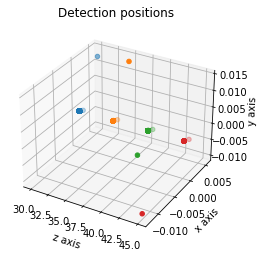

In [140]:
# test code

plt.figure(1)
ax= plt.axes(projection= '3d')
plt.title('Detection positions')
ax.set_zlabel('y axis')
ax.set_xlabel('z axis')
ax.set_ylabel('x axis')
ax.scatter3D(30,smear(x_1,0.01,n),smear(y_1,0.01,n))
ax.scatter3D(35,smear(x_2,0.01,n),smear(y_2,0.01,n))
ax.scatter3D(40,smear(x_3,0.01,n),smear(y_3,0.01,n))
ax.scatter3D(45,smear(x_4,0.01,n),smear(y_4,0.01,n))
plt.show() 

## Part 5 - Track Reconstruction

In the real experiment, one would use the measured hits in tracking stations to "reconstruct" the track of the decay product.  You should perform the same process using the smeared hit positions. 

The location of the hits at the $i$-th tracking station can be written in terms of the track parameters $(m_x, m_y, c_x, c_y)$ and the $z$ position of the tracking station :

$$
\begin{pmatrix}
m_x \\
m_y
\end{pmatrix}
z_i
+
\begin{pmatrix}
c_x \\
c_y
\end{pmatrix}
=
\begin{pmatrix}
x_i \\
y_i
\end{pmatrix}
$$

For $N$ tracking stations, we have a set of $N$ such equations.  We can write these equations as a matrix equation  :
$$M j_{trk} = x_{hits}$$

Where $x_{hits}$ is vector containing all the measured hit coordinates, $j_{trk}$ is the track parameters, and $M$ is a matrix which depends on the tracking station positions.  For example, with 3 tracking stations, we have :

$$
\begin{pmatrix}
z_0 & 0   & 1 & 0 \\
0   & z_0 & 0 & 1 \\
z_1 & 0   & 1 & 0 \\ 
0   & z_1 & 0 & 1 \\
z_2 & 0   & 1 & 0 \\
0   & z_2 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
m_x \\
m_y \\
c_x \\
c_y
\end{pmatrix}
=
\begin{pmatrix}
x_0 \\
y_0 \\
x_1 \\
y_1 \\
x_2 \\
y_2
\end{pmatrix}
$$

The track parameters can be obtained by solving the matrix equation above.  When choosing an algorithm to solve the equation, note that there is almost certainly not an exact solution, due to the smearing of hit positions.  You should use an algorithm which will find the _closest_ solution.

In the cell below, write functions to first construct the matrix equation, and then to solve it.

In [141]:
# track reconstruction functions

def matrix(z_1,z_2,z_3,z_4):
    '''generates the matrix'''
    M= np.array([[z_1,0,1,0],[0,z_1,0,1],[z_2,0,1,0],[0,z_2,0,1],[z_3,0,1,0],[0,z_3,0,1], [z_4,0,1,0],[0,z_4,0,1]])
    return np.linalg.pinv(M)




A=matrix(30,35,40,45)

    


dic_pos= np.zeros([n,8])
def matrix_2():
    """generates a mtrix"""
    for i in range(n):
        dic_pos[i,0]=x_1[i]
        dic_pos[i,1]=y_1[i]
        dic_pos[i,2]=x_2[i]
        dic_pos[i,3]=y_2[i]
        dic_pos[i,4]=x_3[i]
        dic_pos[i,5]=y_3[i]
        dic_pos[i,6]=x_4[i]
        dic_pos[i,7]=y_4[i]
        
    return dic_pos

B=matrix_2()




solve= np.zeros([4,n])

def parameter_finder():
    '''finds the parameter using matrix manupilation'''
    for i in range(n):
        solve[:,i]= A@B[i,:]
    return solve

parameter_finder()


array([[ 6.19616604e-09,  2.93507140e-09, -8.20607608e-09, ...,
         7.94953656e-09,  5.56375378e-08, -1.22043899e-03],
       [ 9.14401051e-09, -2.63297709e-08, -2.00905854e-09, ...,
        -2.47559811e-09, -3.26426923e-09, -1.71193953e-03],
       [-3.86964069e-08, -8.75787623e-09,  2.13864346e-07, ...,
        -2.61174722e-08, -2.42666712e-07,  4.44291833e-02],
       [-5.71063379e-08,  7.85646557e-08,  5.23594938e-08, ...,
         8.13335020e-09,  1.42373209e-08,  6.72427188e-02]])

In the cell below, test your code

In [142]:
# test code
print('The parameters from part 3 match as shown below for one set:')
print(parameter_finder()[:,0])
print(m_x[0],m_y[0],c_x[0],c_y[0])

The parameters from part 3 match as shown below for one set:
[ 6.19616604e-09  9.14401051e-09 -3.86964069e-08 -5.71063379e-08]
6.1961660410500965e-09 9.144010510022808e-09 -3.869640689242807e-08 -5.7106337851545714e-08


## Part 6 - Vertex Reconstruction

The reconstructed track parameters can be used to estimate the orginal decay position. In the absence of mis-measurement, the $z$ position of the decay can be found from the intercept of the track and the $z$-axis. However, due to the finite detector resolution, the reconstructed track may not exactly intercept the $z$-axis.  Instead, you can use the point where the track is closest, in the $(x-y)$ plane, to the $z$-axis.

The distance from the track to the z-axis can be written :
$$r = \sqrt{x^2 + y^2} = \sqrt{(m_x z + c_x)^2 + (m_y z + c_y)^2}$$

This is a quadratic, $r^2 = a z^2 + b z + c$, where $a = m_x^2 +m_y^2$, $b = 2 (m_x c_x + m_y c_y)$ and $c = c_x^2 + c_y^2$.

By converting to quadratic standard form, we can obtain the value of $z$ where $r^2$ is a minimum :
$$z_{vtx} = - \frac{(m_x c_x + m_y c_y)}{m_x^2 +m_y^2}$$

In the cell below, write a function which uses this formula to calculate the vertex position from the reconstructed track parameters.

In [143]:
# vertex reconstruction functions

zvtx= np.zeros(n)
def z_vtx():
    '''finds the reconstructed vetex'''
    for i in range(n):
        zvtx[i]= -(((solve[0,i]*solve[2,i])+(solve[1,i]*solve[3,i]))/((solve[0,i]**2)+(solve[1,i]**2)))
    return zvtx
   
   
z_vtx()    

array([6.24521787e+00, 2.98387161e+00, 2.60617065e+01, 4.62696444e+00,
       1.78381853e+00, 1.47688449e+01, 1.24686434e+01, 9.83186497e-01,
       3.78616834e+00, 1.62925828e+00, 1.16280893e+01, 4.20625001e-01,
       1.17283964e+00, 8.81615518e+00, 3.83855470e+00, 1.42665469e+00,
       3.17833342e+00, 6.78583114e+00, 2.40210112e+01, 6.98069746e+00,
       8.61855187e+00, 4.84246172e+00, 2.59598932e-01, 4.16201673e+00,
       7.48479811e-01, 9.75843840e+00, 9.96040478e+00, 1.19175310e+01,
       8.50180263e+00, 2.77369941e+00, 1.18877183e+00, 9.15298872e+00,
       2.44309325e+00, 1.24390700e+00, 9.74197070e-01, 6.58495719e+00,
       6.16303551e+00, 1.80028039e-01, 3.22744337e+00, 5.38422650e-01,
       9.47272615e-01, 1.82623110e+01, 9.98352482e+00, 9.20003099e+00,
       2.21073974e+00, 4.24802741e+00, 3.92439536e+00, 8.73737173e+00,
       1.54015836e+00, 2.24564249e+00, 1.34891265e+01, 2.21455746e+01,
       1.08361541e+00, 4.47798265e-01, 9.90067946e-01, 7.14312134e+00,
      

In the next cell, verify this function operates as desired.

In [144]:
print(z_vtx())

[6.24521787e+00 2.98387161e+00 2.60617065e+01 4.62696444e+00
 1.78381853e+00 1.47688449e+01 1.24686434e+01 9.83186497e-01
 3.78616834e+00 1.62925828e+00 1.16280893e+01 4.20625001e-01
 1.17283964e+00 8.81615518e+00 3.83855470e+00 1.42665469e+00
 3.17833342e+00 6.78583114e+00 2.40210112e+01 6.98069746e+00
 8.61855187e+00 4.84246172e+00 2.59598932e-01 4.16201673e+00
 7.48479811e-01 9.75843840e+00 9.96040478e+00 1.19175310e+01
 8.50180263e+00 2.77369941e+00 1.18877183e+00 9.15298872e+00
 2.44309325e+00 1.24390700e+00 9.74197070e-01 6.58495719e+00
 6.16303551e+00 1.80028039e-01 3.22744337e+00 5.38422650e-01
 9.47272615e-01 1.82623110e+01 9.98352482e+00 9.20003099e+00
 2.21073974e+00 4.24802741e+00 3.92439536e+00 8.73737173e+00
 1.54015836e+00 2.24564249e+00 1.34891265e+01 2.21455746e+01
 1.08361541e+00 4.47798265e-01 9.90067946e-01 7.14312134e+00
 2.02811602e+00 2.47878888e-01 1.26637498e+01 1.23726950e+00
 2.17496016e+00 1.12346773e+01 7.69967075e+00 1.29416188e+00
 7.63785789e+00 4.608633

## Part 7 - Full Experiment Simulation

Now you are ready to simulate the full experiment.  You should produce a large sample of events.  For each event, generate a beam particle, a daughter particle, the true and smeared hits, the reconstructed track and the reconstructed vertex.

Given a sample of events, it is possible to compute distributions of various quantities that will inform the design of the experiment.  You should present at least the following :
   * Number of tracking station hits
   * Difference between true and reconstructed decay vertex $z$-coordinate
   * Reconstructed decay vertex $z$-coordinate - which can be used to estimate the measured particle lifetime.

It can also be interesting to explore how these distributions change for different assumptions about the experimental setup, ie. the size, position and resolution of the tracking stations, and the true lifetime of X. As a starting point, you should assume the experiment aims to measure the lifetime of an unstable nucleus undergoing beta decay, with the following parameters :
   * X mean lifetime, $\tau = 2.5 {\rm ms}$
   * Mean X velocity, $\mu_v = 2000 {\rm ms}^{-1}$
   * Std dev X velocity, $\sigma_v = 50 {\rm ms}^{-1}$
   * Tracking station positions, $z_{stn} = 30, 35, 40, 45 {\rm m}$
   * Tracking hit resolution, $\sigma_{rx, ry} = 0.01 {\rm m}$

In [145]:
# full experiment simulation 

zvtx_1=[]
diff=[]
life_time=[]
def final(h):
    '''finds the number of detections, difference in reconstucted and true vertex and the average lifetime of the particles'''
    for i in range(n):
        if D[i]== 1:
            zvtx_1.append(zvtx[i])
            diff.append(ver[i]-zvtx[i])
            life_time.append(zvtx[i]/vz[i])
    np.asarray(zvtx_1)
    np.asarray((diff))
    np.asarray(life_time)
    
    return h


In [146]:
# analysis code
print('The number of tracting hits are:')
print(len(final(zvtx_1)))
print('The different between true and reconstructed vertex are: ')
print(final(diff))
print('the average difference between true and reconstructed vertex is:')
print(np.average(final(diff)))
print('The average life time is:')
print(np.average(final(life_time)))


The number of tracting hits are:
517
The different between true and reconstructed vertex are: 
[8.881784197001252e-15, 1.509903313490213e-14, 5.329070518200751e-15, 2.55351295663786e-14, 3.552713678800501e-15, 8.881784197001252e-15, 6.217248937900877e-15, 2.398081733190338e-14, 7.105427357601002e-15, 2.2648549702353193e-14, -3.552713678800501e-15, 5.329070518200751e-15, 1.9539925233402755e-14, 1.687538997430238e-14, 2.1593837828959295e-14, 3.552713678800501e-15, 7.105427357601002e-15, 5.329070518200751e-15, 3.530509218307998e-14, 1.3322676295501878e-14, 1.4654943925052066e-14, 1.176836406102666e-14, 3.552713678800501e-15, 1.1102230246251565e-14, -4.440892098500626e-15, 1.2434497875801753e-14, 2.0872192862952943e-14, 3.552713678800501e-15, 7.716050021144838e-15, 2.531308496145357e-14, 3.1530333899354446e-14, 8.881784197001252e-15, 8.881784197001252e-15, 1.5987211554602254e-14, 7.993605777301127e-15, 2.6645352591003757e-15, 8.881784197001252e-15, 5.329070518200751e-15, 0.0, 3.55271367880

## Part 8 - Discussion

In the markdown cell below, describe how your code solves the problem set. State any equations used in the solution and how they were obtained. Include your reasons for any libraries you used, as well as any particular programming techniques. Explain your choice of any test cases. Finally, state any salient features of the results you obtained, and any conclusions. You are not expected to write more than 600-700 words, and you don't need to repeat information already given in the assignment.


## Discussion
The above program aims to simulate an experiment by deviding the experiment into smaller stages and then dealing with each stage by writing a fucntion that simulates the the given part of the experiment. The pragram generates a 1000 particle (can be changed by the user) and assigns them a velocity that is normally distributed. The time decay in first part is also distributed randomly but by exponential decay. and lastly the angle of the daughter particle in part 2 were also generated randomly. Therefore this code takes advantage of the randomness of nature to build a particle decay simulation as close to reality as possible. 

### Equations: 
Part 3 required some geometrical analysis to find the trac parameters, which included the gradient and intercept of x and y axis. The equation derived form the analysis is as follows:

$$M_x= \frac{x}{z}$$ 
$$c_x= -M_x*D_d$$

Where $D_d$ is the distance to decay in the lab frame. 

The other wquation involved was a set of linear equations solved using matric manupilation using the the numpy library. 

### Tests and Results : 

In part 1 the graphs prduced show that the generated particle do follow a normal distribution with mean of 2000m/s and standard diviation of 50m/s. The time decay graph aslo shows exponential decay. Part 2 involved producing direction for daughter partiicles which should have a uniform districution around a isotropic sphear as phi is distributed randomly and theeta is distributed propotional to $sin(theeta)$. The 3d graphs shows the random distribution. This part also involved using transforming from rest frame to lab frame. since the initial particles only has velocity in the z direction the galilian transformation would just be a shift in the z direction. this is shown in the second graph. Part 4 of the simulation adds smearing to the detected values at 4 different detectors. The graph is successfull in showing the location of the 4 detectors and the smearring caused by the resolution of the detectors. In part 5, the parameters were found again and compared to the parameters foud in part 3. The similarity between the parameter showed that the prgram worked as wanted. Finally part 6 calculated the reconstructed vetex. In part 7, all the functions were called and the average life time was calculated. The average was close to 2.5ms which is what was desired. 

### Possible improvements : 
The above code is intended to simulate the experiment as close to reality as possible, but there are many improments that is needed to make it better. The above code only works for 4 detectors, this problem can easily be solved by changing a few lines of the code in part 5 and part 3. The particles only have velocity in z direction which can also be solved by adding a few lines of code in part 1 and part 2.








## Extention- 3D velocity

This extention includes the velocity of initial particles in all direction. Since the velocity is added in 3d to initial particle only part 1 and part 2 od the code needs changing. Therefore using the function below instead of part 1 and part 2 will make the code work for any velocity of particle beam. 

In [130]:
# Extention

vx = np.zeros([n])
vy = np.zeros([n])
speed= np.zeros([n])
def beam_make_2(u,s):
    ''' Function makes a beam of particle with velcities distributed normally in x, y and z direction'''
    #global vz
    z_velocity= np.random.normal(u,s,n)
    x_velocity= np.random.normal(u,s,n)
    y_velocity= np.random.normal(u,s,n)
    for i in range(n):
        velocity[i,2]= z_velocity[i]
        velocity[i,0]= x_velocity[i]
        velocity[i,1]= y_velocity[i]
        vz[i]= z_velocity[i]
        vx[i]= x_velocity[i]
        vy[i]= y_velocity[i]
        speed[i]= np.sqrt(((vx[i]**2)+(vy[i]**2)+(vz[i]**2)))
    return speed 

speed=beam_make_2(2000, 0.01)

ver1 = np.zeros([n])
def dist1(u, s, t):
    for i in range(n):
        ver1[i]=decay[i]*speed[i] 
    return ver1

ver1= dist1(2000,50,2.5e-3)

x_lab1 = np.zeros(n)
y_lab1 = np.zeros (n)
z_lab1 = np.zeros(n)

def lab_frame1(h):
    for i in range(n):
        z_lab1[i]= speed[i]+ z_angle[i]*10e7
        x_lab1[i]= speed[i]+ x_angle[i]*10e7
        y_lab1[i]= speed[i]+ y_angle[i]*10e7
    return h
